# OKCupid Date-A-Scientist

## Introduction

Dating apps have become increasingly popular in recent years for finding love. A number of these apps make use of data science techniques to recommend possible matches to users and to optimize the user experience. Through these apps, we can gain access to a wealth of information about how people experience romance differently.

OKCupid is a dating app developed by Dating Agency that focuses on using multiple choice and short answers to match users. As a data scientist in Dating Agency, the goal of this project is uncover insights from the dataset and build a model with an ROC AUC score > 0.90 to predict whether an OKCupid user drinks or smokes or uses drug.

**Data sources:**
The dataset `profiles.csv` is provided by Codecademy.com.

## Import Python modules

In [1]:
# General libraries
import numpy as np
import pandas as pd

# For plotting
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# For modeling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_auc_score

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

#import warnings
#warnings.filterwarnings('ignore')

## Load dataset

In [2]:
# Read the profiles csv file
profiles_df = pd.read_csv('./datasets/profiles.csv', encoding='utf-8')

## Data Overview

- There are 59946 rows and 31 columns in the profiles dataset.
- Each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

- The columns in the dataset include: 

|Variable       |Description                                  |Variable Type|Missing value|
|:--------------|:--------------------------------------------|:------------|:------------|
|age            |age of user                                  |continuous   |0            |
|body_type      |body type of user                            |categorical  |5296         |
|diet           |dietary information                          |categorical  |24395        |
|drinks         |alcohol consumption                          |categorical  |2985         |
|drugs          |drug usage                                   |categorical  |14080        |
|education      |educational attainment                       |categorical  |6628         |
|ethnicity      |ethnic backgrounds                           |categorical  |5680         |
|height         |height of user                               |continuous   |3            |
|income         |income of user                               |continuous   |0            |
|job            |employment description                       |categorical  |8198         |
|offspring      |children status                              |categorical  |35561        |
|orientation    |sexual orientation                           |categorical  |0            |
|pets           |pet preferences                              |categorical  |19921        |
|religion       |religious background                         |categorical  |20226        |
|sex            |gender                                       |categorical  |0            |
|sign           |astrological symbol                          |categorical  |0            |
|smokes         |smoking consumption                          |categorical  |0            |
|status         |relationship status                          |categorical  |0            |
|speaks         |language spoken                              |categorical  |0            |
|last_online    |last login                                   |date         |0            |
|location       |user locations                               |categorical  |0            |

- And a set of open short-answer responses to :

|Variable       |Description                                   |Variable Type|Missing value|
|:--------------|:---------------------------------------------|:------------|:------------|
|essay0         |My self summary                               |categorical  |5488         |
|essay1         |What I’m doing with my life                   |categorical  |7572         |
|essay2         |I’m really good at                            |categorical  |9638         |
|essay3         |The first thing people usually notice about me|categorical  |11476        |
|essay4         |Favorite books, movies, show, music, and food |categorical  |10537        |
|essay5         |The six things I could never do without       |categorical  |10850        |
|essay6         |I spend a lot of time thinking about          |categorical  |13771        |
|essay7         |On a typical Friday night I am                |categorical  |12451        |
|essay8         |The most private thing I am willing to admit  |categorical  |19225        |
|essay9         |You should message me if…                     |categorical  |12603        |

- There are quite a number of variables with missing values. We will explore the data first before handling the missing values.

In [3]:
profiles_df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake myself a little better everyday, in some productively lazy\nway. got tired of tying my shoes. considered hiring a five year\nold, but would probably have to tie both of our shoes... decided to\nonly wear leather shoes dress shoes.<br />\n<br />\nabout you:<br />\n<br />\nyou love to have really serious, really deep conversations about\nreally silly stuff. you have to be willing to snap me out of a\nlight hearted rant with a kiss. you don't have to be funny, but you\nhave to be able to make me laugh. you should be able to bend spoons\nwith your mind, and telepathically make me smile while i am still\nat work. you should love life, and be cool with just letting the\nwind blow. extra points for reading all this and guessing my\nfavorite video game (no hints given yet). and lastly you have a\ngood attention span.","currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.<br />\nonline classes and trying to better myself in my free time. perhaps\na hours worth of a good book or a video game on a lazy sunday.","making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.","the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notice me, and for me to blend in.",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook regardless of whether i am at work.<br />\n3. i love to drink and eat foods that are probably really bad for\nme.<br />\n4. i love being around people that resemble line 1-3.<br />\ni love the outdoors and i am an avid skier. if its snowing i will\nbe in tahoe at the very least. i am a very confident and friendly.\ni'm not interested in acting or being a typical guy. i have no time\nor patience for rediculous acts of territorial pissing. overall i\nam a very likable easygoing individual. i am very adventurous and\nalways looking forward to doing new things and hopefully sharing it\nwith the right person.,dedicating everyday to being an unbelievable badass.,being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;),NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (poorly)",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public text on an online\ndating site makes me pleasantly uncomfortable. i'll try to be as\nearnest as possible in the noble endeavor of standing naked before\nthe world.<br />\n<br />\ni've lived in san francisco for 15 years, and both love it and find\nmyself frustrated with its deficits. lots of great friends and\nacquaintances (which increases my apprehension to put anything on\nthis site), but i'm feeling like meeting some new people that\naren't just friends of friends. it's ok

In [4]:
profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [5]:
# Check null values
profiles_df.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

## Exploratory Data Analysis

### Continuous variable

In [6]:
profiles_df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [7]:
def plot_displot(df, x, hue, title, xlabel, binwidth):
    sns.displot(data=profiles_df, x=x, hue=hue, kind='hist', binwidth=binwidth, multiple = 'stack')
    plt.title(title, fontsize=15, fontweight='bold')
    plt.xlabel(xlabel)
    #plt.axvline(df[x].median(), color='r', linestyle='dashed', linewidth=3, label='Median')
    #plt.axvline(df[x].mean(), color='k', linestyle='dashed', linewidth=3, label = 'Mean')
    #plt.legend(loc='best', ncol=2)

#### Age

The age distribution is right-skewed. Most OKCupid users are in their late 20s to early 30s. There are more male than female using the app.

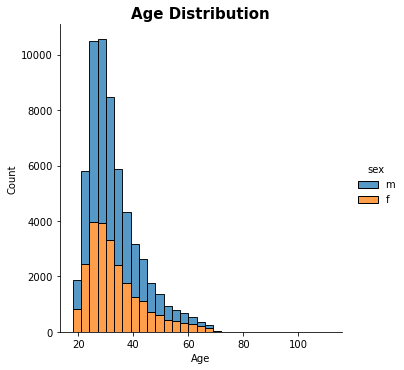

In [8]:
# Plot age distribution
plot_displot(profiles_df, 'age', 'sex', 'Age Distribution', 'Age', 3)

#### Height

Height is normally distributed with an average of 68. Males are generally taller than female.

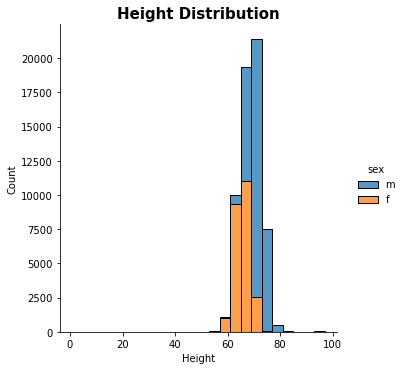

In [9]:
# Plot height distribution
plot_displot(profiles_df, 'height', 'sex', 'Height Distribution', 'Height', 4)

#### Income

The income distribution is right-skewed and it appears that most users do not provide their income. There is a small number of users with income \\$1000000.

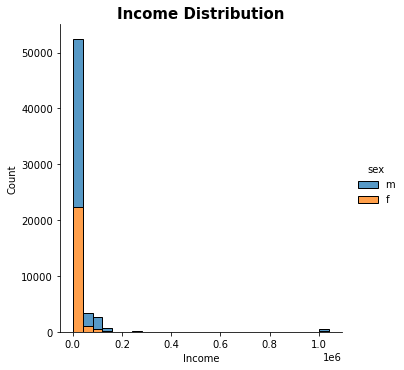

In [10]:
# Plot income distribution
plot_displot(profiles_df, 'income', 'sex', 'Income Distribution', 'Income', 40000)

In [11]:
profiles_df['income'].value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

### Categorical variable

In [12]:
def plot_countplot(df, y, title, ylabel, hue=None):
    plt.subplots(figsize=(10,5))
    sns.countplot(data=df, y=y, hue=hue, order=df[y].value_counts().index)
    plt.title(title, fontsize=15, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel(ylabel)
    if hue != None:
        plt.legend(loc='lower right', ncol=2)

#### Body Type

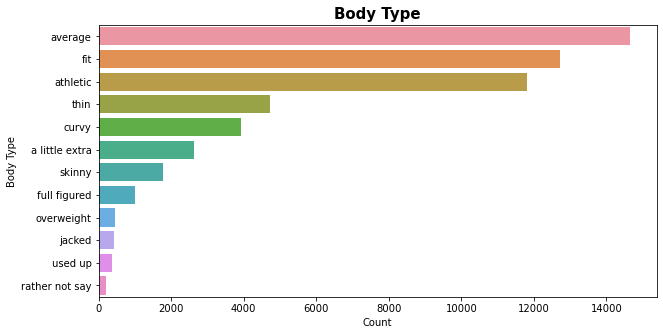

In [13]:
# Plot body type countplot
plot_countplot(profiles_df, 'body_type', 'Body Type', 'Body Type')

- Majority of the users felt that they have an average body build, followed by a fit and athletic body build.

#### Diet

In [14]:
profiles_df['diet'].value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64

In [15]:
# Split the text and extract the second position text
profiles_df['diet_cleaned'] = profiles_df.diet.str.split().str.get(-1)
profiles_df['diet_cleaned'].value_counts()

anything      27881
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: diet_cleaned, dtype: int64

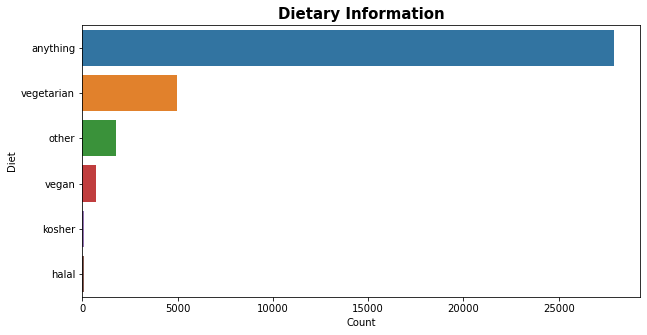

In [16]:
# Plot diet countplot
plot_countplot(profiles_df, 'diet_cleaned', 'Dietary Information', 'Diet')

- Most users have no dietary restriction.

#### Education

In [17]:
profiles_df['education'].value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [18]:
# Split the text and extract the last 2 positions text and join them
profiles_df['education_cleaned'] = profiles_df.education.str.split().str[-2:].str.join(' ')
profiles_df['education_cleaned'].value_counts()

from college/university    23959
masters program            10920
on college/university       5712
two-year college            3018
ph.d program                2408
high school                 1713
space camp                  1683
law school                  1428
of college/university        995
college/university           801
med school                   681
Name: education_cleaned, dtype: int64

In [19]:
# Perform further cleaning on the education column
ed_dict = {'from college/university': 'college/university', 
           'masters program': 'masters program', 
           'on college/university': 'college/university', 
           'two-year college': 'two-year college', 
           'ph.d program': 'ph.d program', 
           'high school':'high school', 
           'space camp': 'space camp', 
           'law school': 'law school', 
           'of college/university': 'college/university', 
           'college/university':'college/university', 
           'med school': 'med school'}

profiles_df['education_cleaned'] = profiles_df['education_cleaned'].map(ed_dict)
profiles_df['education_cleaned'].value_counts()

college/university    31467
masters program       10920
two-year college       3018
ph.d program           2408
high school            1713
space camp             1683
law school             1428
med school              681
Name: education_cleaned, dtype: int64

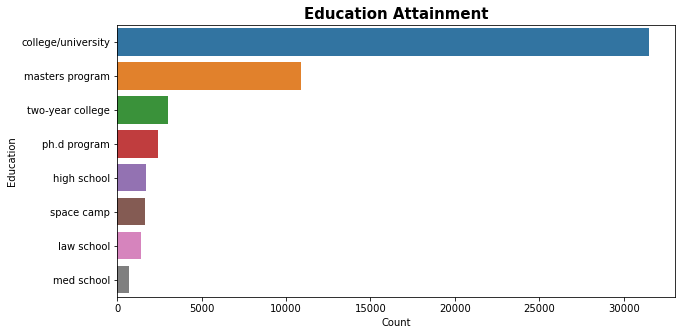

In [20]:
# Plot education countplot
plot_countplot(profiles_df, 'education_cleaned', 'Education Attainment', 'Education')

- Majority of the users have a college/university education.

#### Religion

In [21]:
profiles_df['religion'].value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

In [22]:
# Split the text with the comma and extract the first position text
profiles_df['religion_cleaned'] = profiles_df.religion.str.split().str.get(0)
profiles_df['religion_cleaned'].value_counts()

agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religion_cleaned, dtype: int64

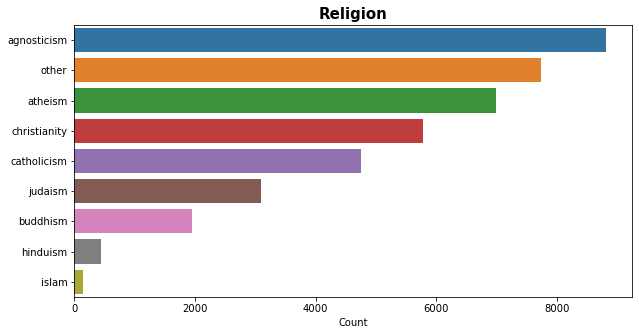

In [23]:
# Plot religion countplot
plot_countplot(profiles_df, 'religion_cleaned', 'Religion', None)

- Most users are agnosticism, other or athesim and it shows majority are not so religious.

#### Astrological symbol

In [24]:
profiles_df['sign'].value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

In [25]:
# Split the text with the comma and extract the first position text
profiles_df['sign_cleaned'] = profiles_df.sign.str.split().str.get(0)
profiles_df['sign_cleaned'].value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: sign_cleaned, dtype: int64

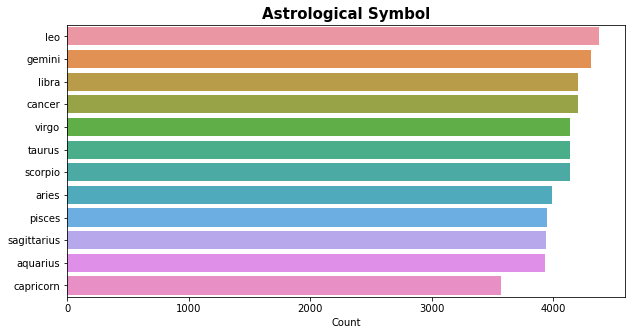

In [26]:
# Plot astrological symbol countplot
plot_countplot(profiles_df, 'sign_cleaned', 'Astrological Symbol', None)

- There are less capricorn users in this dataset.

#### Job

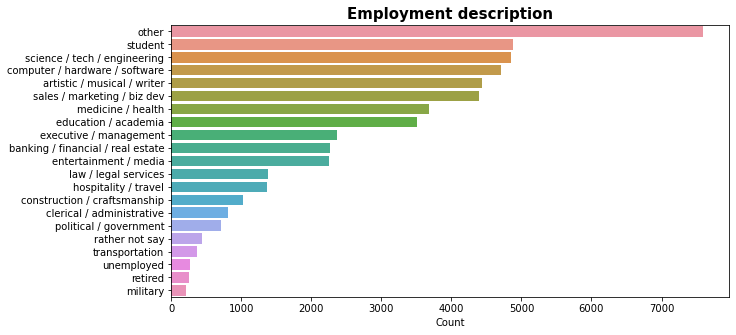

In [27]:
# Plot employment countplot
plot_countplot(profiles_df, 'job', 'Employment description', None)

#### Orientation

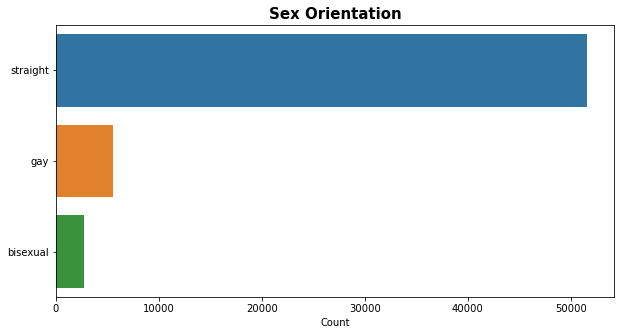

In [28]:
# Plot orientation countplot
plot_countplot(profiles_df, 'orientation', 'Sex Orientation', None)

#### Offspring

In [29]:
profiles_df['offspring'].value_counts()

doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: offspring, dtype: int64

In [30]:
# Replace 'doesn&rsquo;t' with 'doesn't'.
profiles_df['offspring'] = profiles_df['offspring'].replace(['doesn&rsquo;t'], ["doesn't"], regex=True)
profiles_df['offspring'].value_counts()

doesn't have kids                          7560
doesn't have kids, but might want them     3875
doesn't have kids, but wants them          3565
doesn't want kids                          2927
has kids                                   1883
has a kid                                  1881
doesn't have kids, and doesn't want any    1132
has kids, but doesn't want more             442
has a kid, but doesn't want more            275
has a kid, and might want more              231
wants kids                                  225
might want kids                             182
has kids, and might want more               115
has a kid, and wants more                    71
has kids, and wants more                     21
Name: offspring, dtype: int64

In [31]:
# Split the text with the comma and extract the first position text
profiles_df['offspring_cleaned'] = profiles_df.offspring.str.split(',').str.get(0)
profiles_df['offspring_cleaned'].value_counts()

doesn't have kids    16132
doesn't want kids     2927
has kids              2461
has a kid             2458
wants kids             225
might want kids        182
Name: offspring_cleaned, dtype: int64

In [32]:
# Perform further cleaning on the offspring column
offspring_dict = {"doesn't have kids" : "No children",
                  "doesn't want kids" : "Do not want children",
                  "has kids" : "Have children",
                  "has a kid" : "Have children",
                  "wants kid" : "Want children",
                  "might want kids" : "Want children"}

profiles_df['offspring_cleaned'] = profiles_df['offspring_cleaned'].map(offspring_dict)
profiles_df['offspring_cleaned'].value_counts()

No children             16132
Have children            4919
Do not want children     2927
Want children             182
Name: offspring_cleaned, dtype: int64

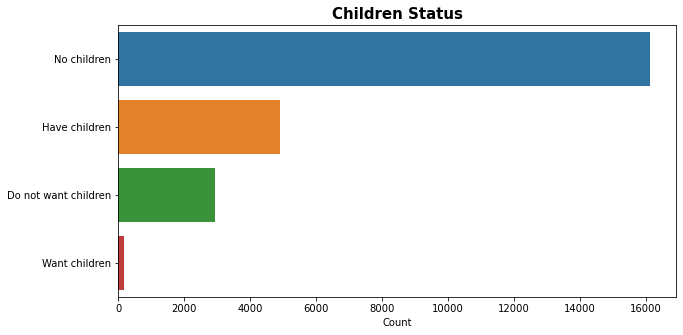

In [33]:
# Plot offspring countplot
plot_countplot(profiles_df, 'offspring_cleaned', 'Children Status', None)

#### Relationship status

In [34]:
profiles_df['status'].value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

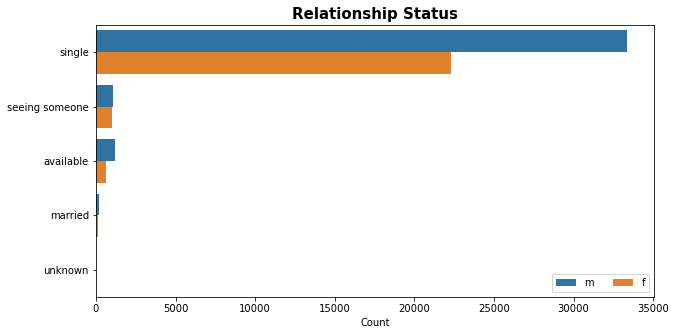

In [35]:
# Plot offspring countplot
plot_countplot(profiles_df, 'status', 'Relationship Status', None, 'sex')

- Majority of the users are single or available. This makes sense as user joined the dating app to find someone. 
- There is a small percentage of the users that are non-single using the app. These users may currently have relationship problems.

#### Location

In [36]:
profiles_df['location'].value_counts()

san francisco, california              31064
oakland, california                     7214
berkeley, california                    4212
san mateo, california                   1331
palo alto, california                   1064
alameda, california                      910
san rafael, california                   755
hayward, california                      747
emeryville, california                   738
redwood city, california                 693
daly city, california                    681
san leandro, california                  651
walnut creek, california                 644
vallejo, california                      558
menlo park, california                   479
richmond, california                     424
south san francisco, california          416
mountain view, california                384
novato, california                       369
burlingame, california                   361
pleasant hill, california                347
castro valley, california                345
stanford, 

In [37]:
# Split the text with the comma and extract the first position text
profiles_df['location_cleaned'] = profiles_df.location.str.split(',').str.get(1)
profiles_df['location_cleaned'].value_counts()

 california              59855
 new york                   17
 illinois                    8
 massachusetts               5
 texas                       4
 oregon                      4
 michigan                    4
 arizona                     3
 florida                     3
 district of columbia        2
 washington                  2
 utah                        2
 georgia                     2
 minnesota                   2
 colorado                    2
 united kingdom              2
 ohio                        2
 spain                       2
 virginia                    2
 hawaii                      2
 louisiana                   1
 tennessee                   1
 mexico                      1
 switzerland                 1
 netherlands                 1
 pennsylvania                1
 germany                     1
 missouri                    1
 british columbia            1
 rhode island                1
 connecticut                 1
 ireland                     1
 west vi

- Most of the users reside in California.

#### Pets

In [38]:
profiles_df['pets'].value_counts()

likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

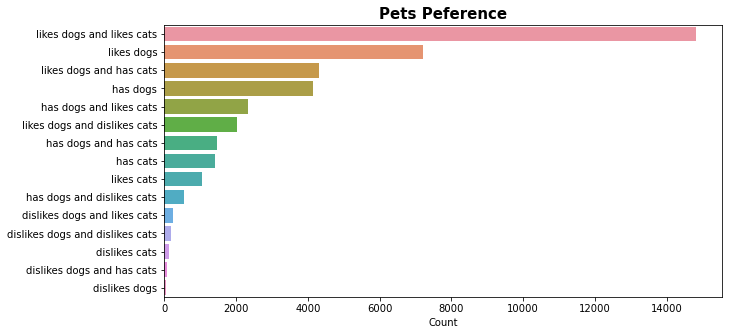

In [39]:
# Plot pets preference countplot
plot_countplot(profiles_df, 'pets', 'Pets Peference', None)

- Most users like like dogs or has dogs.

#### Ethnicity

In [40]:
profiles_df['ethnicity'].value_counts()

white                                                                                                      32831
asian                                                                                                       6134
hispanic / latin                                                                                            2823
black                                                                                                       2008
other                                                                                                       1706
hispanic / latin, white                                                                                     1301
indian                                                                                                      1077
asian, white                                                                                                 811
white, other                                                                                    

In [41]:
# Split the text with the comma and extract the first position text
profiles_df['ethnicity_cleaned'] = profiles_df.ethnicity.str.split(',').str.get(0)
profiles_df['ethnicity_cleaned'].value_counts()

white               33472
asian                8205
hispanic / latin     4379
black                3071
other                1706
indian               1196
middle eastern        811
pacific islander      717
native american       709
Name: ethnicity_cleaned, dtype: int64

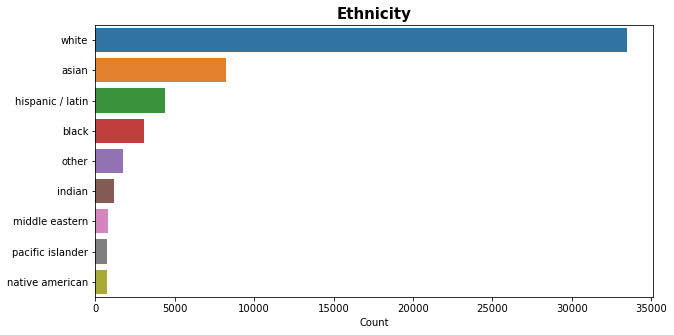

In [42]:
# Plot ethnicity countplot
plot_countplot(profiles_df, 'ethnicity_cleaned', 'Ethnicity', None)

- Majority of the users are white.

#### Vices

Vices include drinking, smoking and drug consumption.

##### Alcohol consumption

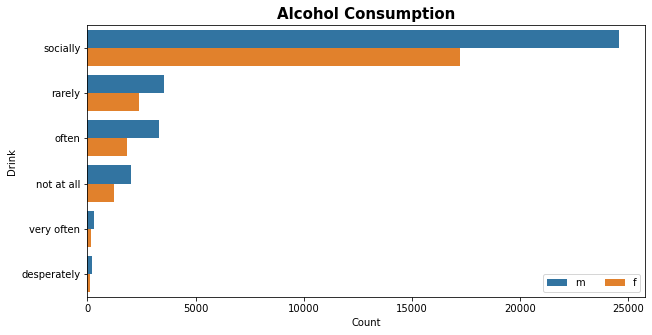

In [43]:
# Plot alcohol consumption countplot
plot_countplot(profiles_df, 'drinks', 'Alcohol Consumption', 'Drink', 'sex')

- Most users drinks while socializing. Male has a higher tendency to drink.

##### Smoke consumption

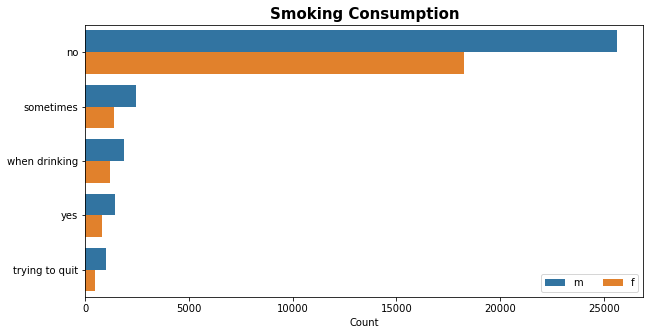

In [44]:
# Plot smoking countplot
plot_countplot(profiles_df, 'smokes', 'Smoking Consumption', None, 'sex')

- Most users do not smoke.
- For smokers, there are more males than females.

##### Drug Usage

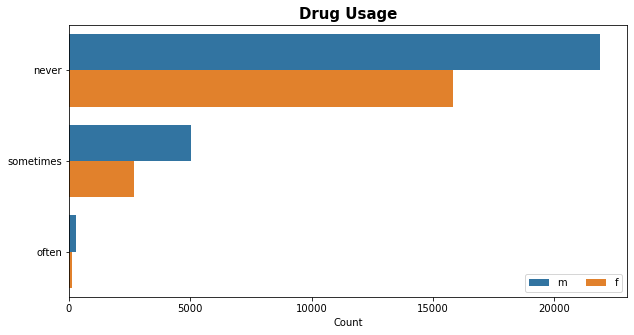

In [45]:
# Plot drug usage countplot
plot_countplot(profiles_df, 'drugs', 'Drug Usage', None, 'sex')

- Most users do not consume drugs.
- For those who use drugs, there are more males than females.

##### Education vs Vices

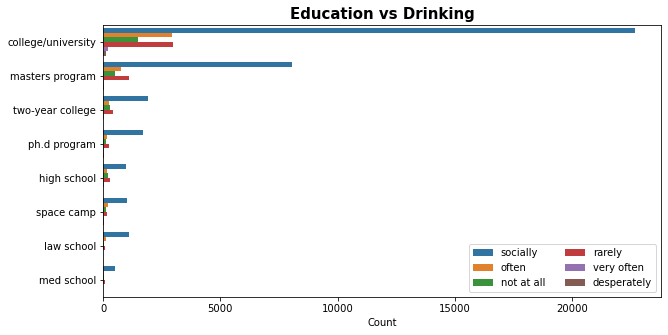

In [46]:
# Check education vs drinking
plot_countplot(profiles_df, 'education_cleaned', 'Education vs Drinking', None, 'drinks')

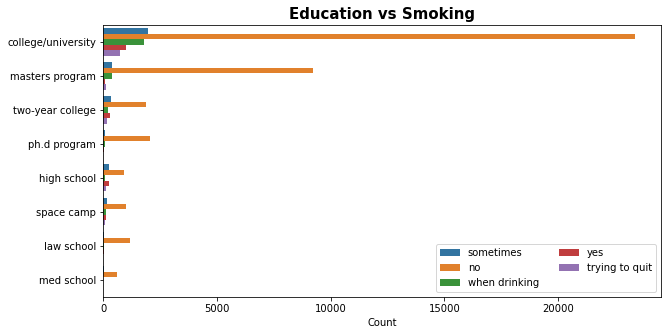

In [47]:
# Check education vs smoking consumption
plot_countplot(profiles_df, 'education_cleaned', 'Education vs Smoking', None, 'smokes')

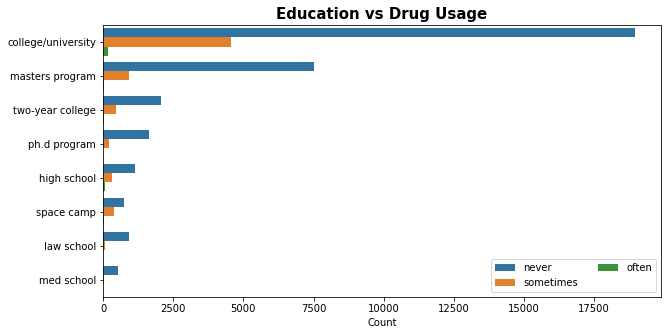

In [48]:
# Check education vs drug usage
plot_countplot(profiles_df, 'education_cleaned', 'Education vs Drug Usage', None, 'drugs')

- From the above visualizations, users with a college/university education is more prone to vices. This make sense as most of the users are graduated from college/university.

##### Religion vs Vices

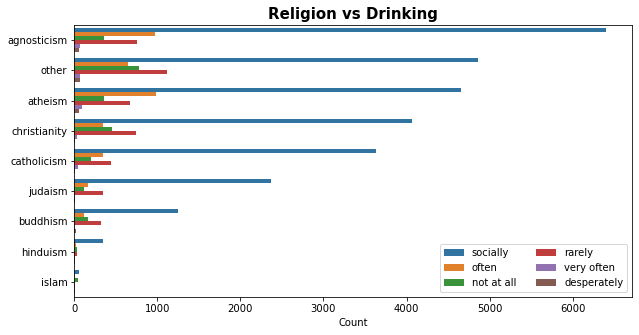

In [49]:
# Check religion vs drinking
plot_countplot(profiles_df, 'religion_cleaned', 'Religion vs Drinking', None, 'drinks')

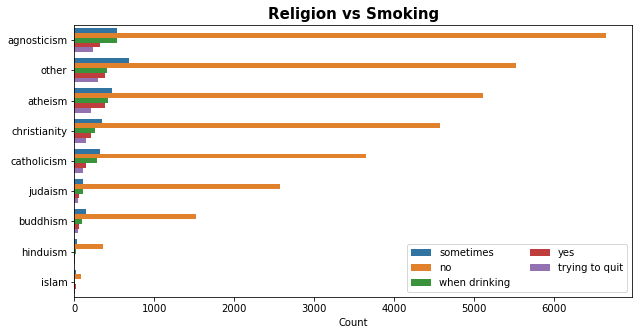

In [50]:
# Check religion vs smoking consumption
plot_countplot(profiles_df, 'religion_cleaned', 'Religion vs Smoking', None, 'smokes')

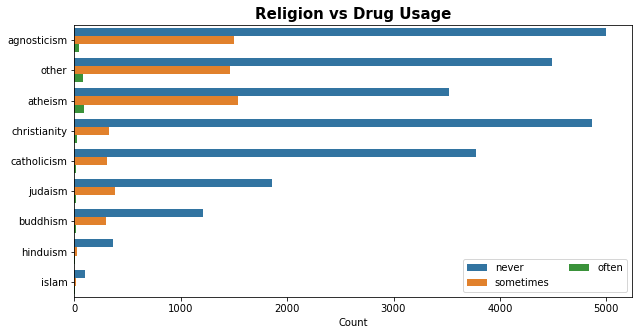

In [51]:
# Check religion vs drug usage
plot_countplot(profiles_df, 'religion_cleaned', 'Religion vs Drug Usage', None, 'drugs')

- From the above visualizations, we do not observe any religion group that is more prone to vices.

##### Astrological Symbol vs Vices

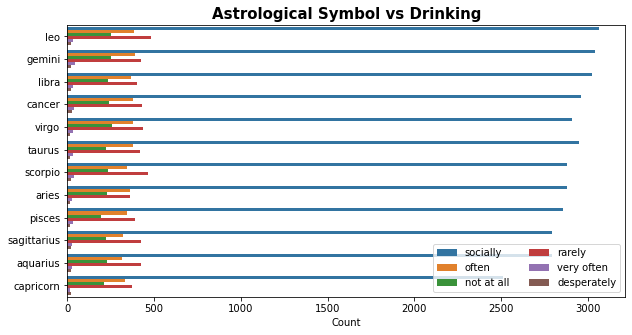

In [52]:
# Check astrological symbol vs drinking
plot_countplot(profiles_df, 'sign_cleaned', 'Astrological Symbol vs Drinking', None, 'drinks')

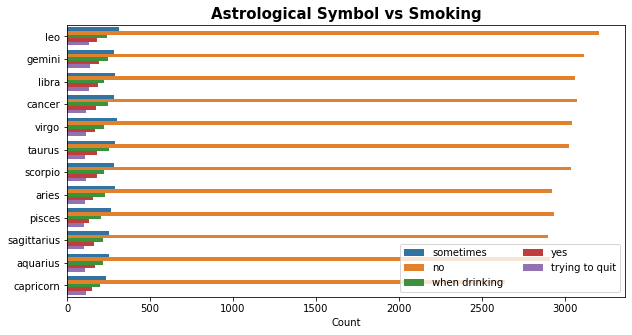

In [53]:
# Check astrological symbol vs smoking
plot_countplot(profiles_df, 'sign_cleaned', 'Astrological Symbol vs Smoking', None, 'smokes')

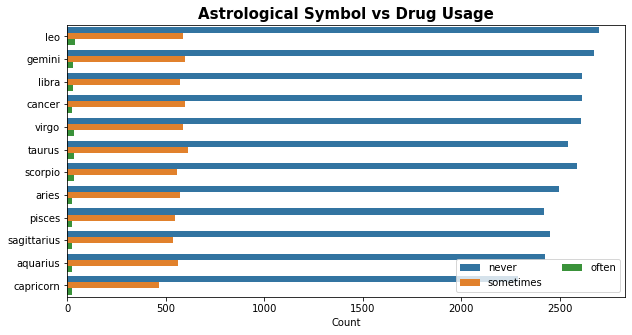

In [54]:
# Check astrological symbol vs drugs
plot_countplot(profiles_df, 'sign_cleaned', 'Astrological Symbol vs Drug Usage', None, 'drugs')

- From the above visualizations, we do not observe any astrological symbol that is more prone to vices.

## Feature engineering

### Create target

- We are predicting whether a user smoke or drink or uses drugs. Hence, we will create a new feature 'has vice' as our target.
- We will need to drop all the null values for these variables since we cannot have any missing data.

In [55]:
# Drop rows with null values for drinks, smokes and drugs columns
profiles_df.dropna(subset=['drinks', 'smokes', 'drugs'], inplace=True)
profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42495 entries, 0 to 59944
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                42495 non-null  int64  
 1   body_type          39427 non-null  object 
 2   diet               26067 non-null  object 
 3   drinks             42495 non-null  object 
 4   drugs              42495 non-null  object 
 5   education          38688 non-null  object 
 6   essay0             38783 non-null  object 
 7   essay1             37250 non-null  object 
 8   essay2             35832 non-null  object 
 9   essay3             34861 non-null  object 
 10  essay4             35183 non-null  object 
 11  essay5             35158 non-null  object 
 12  essay6             32904 non-null  object 
 13  essay7             34119 non-null  object 
 14  essay8             29145 non-null  object 
 15  essay9             33702 non-null  object 
 16  ethnicity          392

In [56]:
# Create a column to define whether the user drinks or not
profiles_df['is_drinking'] = profiles_df['drinks'].apply(lambda x: 0 if x == 'not at all' else 1)
profiles_df['is_drinking'].value_counts()

1    39478
0     3017
Name: is_drinking, dtype: int64

In [57]:
# Create a column to define whether the user smokes or not
profiles_df['is_smoking'] = profiles_df['smokes'].apply(lambda x: 0 if x == 'no' else 1)
profiles_df['is_smoking'].value_counts()

0    34624
1     7871
Name: is_smoking, dtype: int64

In [58]:
# Create a column to define whether the user uses drugs or not
profiles_df['is_drug_user'] = profiles_df['drugs'].apply(lambda x: 0 if x == 'never' else 1)
profiles_df['is_drug_user'].value_counts()

0    34830
1     7665
Name: is_drug_user, dtype: int64

In [59]:
profiles_df['num_vices'] = profiles_df['is_drinking'] + profiles_df['is_smoking'] + profiles_df['is_drug_user']
profiles_df['num_vices'].value_counts()

1    28468
2     7897
3     3584
0     2546
Name: num_vices, dtype: int64

In [60]:
# Create a column to define whether the user has vices or not
profiles_df['has_vice'] = profiles_df['num_vices'].apply(lambda x: 0 if x == 0 else 1)
profiles_df['has_vice'].value_counts()

1    39949
0     2546
Name: has_vice, dtype: int64

### Feature selection

To predict whether a user smoke, drink or use drug, the below features are selected:
- Age
- Body type
- Height
- Diet
- Education
- Ethnicity
- Religion
- Sex orientation
- Astrological symbol
- Sex
- Has vices (to create target)


In [61]:
# Create a new dataframe df and drop the irrelevant columns
columns_to_drop = ['diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 
                   'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'income', 'job', 'last_online',
                   'location', 'offspring', 'religion', 'sign', 'smokes', 'speaks', 'status', 'pets',
                   'offspring_cleaned', 'location_cleaned', 'is_drinking','is_smoking', 'is_drug_user', 
                   'num_vices']

df = profiles_df.copy()
df.drop(columns = columns_to_drop, inplace = True)
df.head()

,age,body_type,height,orientation,sex,diet_cleaned,education_cleaned,religion_cleaned,sign_cleaned,ethnicity_cleaned,has_vice
0,22,a little extra,75.0,straight,m,anything,college/university,agnosticism,gemini,asian,1
1,35,average,70.0,straight,m,other,space camp,agnosticism,cancer,white,1
4,29,athletic,66.0,straight,m,NaN,college/university,NaN,aquarius,asian,1
7,31,average,65.0,straight,f,anything,college/university,christianity,sagittarius,white,1
9,37,athletic,65.0,straight,m,anything,two-year college,atheism,cancer,white,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42495 entries, 0 to 59944
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                42495 non-null  int64  
 1   body_type          39427 non-null  object 
 2   height             42495 non-null  float64
 3   orientation        42495 non-null  object 
 4   sex                42495 non-null  object 
 5   diet_cleaned       26067 non-null  object 
 6   education_cleaned  38688 non-null  object 
 7   religion_cleaned   30094 non-null  object 
 8   sign_cleaned       35570 non-null  object 
 9   ethnicity_cleaned  39209 non-null  object 
 10  has_vice           42495 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 3.9+ MB


In [63]:
# Drop all rows with null values
df = df.dropna()
df.shape

(15433, 11)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15433 entries, 0 to 59944
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                15433 non-null  int64  
 1   body_type          15433 non-null  object 
 2   height             15433 non-null  float64
 3   orientation        15433 non-null  object 
 4   sex                15433 non-null  object 
 5   diet_cleaned       15433 non-null  object 
 6   education_cleaned  15433 non-null  object 
 7   religion_cleaned   15433 non-null  object 
 8   sign_cleaned       15433 non-null  object 
 9   ethnicity_cleaned  15433 non-null  object 
 10  has_vice           15433 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.4+ MB


In [65]:
# Perform get_dummies for categorical variables
cols = ['body_type', 'orientation', 'sex', 'diet_cleaned', 'education_cleaned', 'religion_cleaned', 
        'sign_cleaned', 'ethnicity_cleaned']

for col in cols:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [66]:
df.head()

,age,height,has_vice,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,...,sign_cleaned_virgo,ethnicity_cleaned_asian,ethnicity_cleaned_black,ethnicity_cleaned_hispanic / latin,ethnicity_cleaned_indian,ethnicity_cleaned_middle eastern,ethnicity_cleaned_native american,ethnicity_cleaned_other,ethnicity_cleaned_pacific islander,ethnicity_cleaned_white
0,22,75.0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,35,70.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,31,65.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,37,65.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,28,72.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Train/Test dataset preparation

The dataset is highly imbalance with only 6.3% of users without vices. We will use SMOTE technique to handle the imbalance dataset.

In [67]:
# Check whether the dataset target is balanced
df['has_vice'].value_counts(normalize = True)

1    0.937083
0    0.062917
Name: has_vice, dtype: float64

### Train/Test split

In [68]:
# Create X and y variables
X = df.drop(columns = ['has_vice'])
y = df['has_vice']

In [69]:
# Create synthetic data for train set using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [70]:
# Check the shape of dataset after smoting
print(X.shape, y.shape)

(28924, 63) (28924,)


In [71]:
# Confirm if the dataset has been balanced
print(pd.Series(y).value_counts())

1    14462
0    14462
Name: has_vice, dtype: int64


In [72]:
# Split the dataset by 0.75 and 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 123)

# Check the shape of both train and val datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21693, 63) (7231, 63) (21693,) (7231,)


### Standard Scaling

In [73]:
# Scale the data
ss = StandardScaler()

# Fit and transform the data
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

## Logistics Regression

The first model adopted is Logistics Regression and it achieved a ROC AUC train score of 0.9654. This result is pretty good. When applied to the test dataset, it achieved a ROC AUC test score of 0.9661. The top 10 predicators are obtained through the lr coefficients.

In [74]:
# Instantiate, fit and predit using Logistic Regression model
lr = LogisticRegression()
lr.fit(Xs_train, y_train)
lr_preds = lr.predict(Xs_test)

In [75]:
# Create a function to print data on the metrics
def metrics(y_test, y_predict):
    print('Accuracy score:', round(accuracy_score(y_test, y_predict), 4), '\n')
    print('ROC AUC score:', round(roc_auc_score(y_test, y_predict), 4), '\n')
    print('-----------------------------------------------------------------')
    print(classification_report(y_test, y_predict))
    print('-----------------------------------------------------------------')

In [76]:
metrics(y_train, lr.predict(Xs_train))

Accuracy score: 0.9654 

ROC AUC score: 0.9654 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10846
           1       0.94      1.00      0.97     10847

    accuracy                           0.97     21693
   macro avg       0.97      0.97      0.97     21693
weighted avg       0.97      0.97      0.97     21693

-----------------------------------------------------------------


In [77]:
metrics(y_test, lr_preds)

Accuracy score: 0.9661 

ROC AUC score: 0.9661 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      3616
           1       0.94      1.00      0.97      3615

    accuracy                           0.97      7231
   macro avg       0.97      0.97      0.97      7231
weighted avg       0.97      0.97      0.97      7231

-----------------------------------------------------------------


Text(0.5, 1.0, 'Top 10 Predictors')

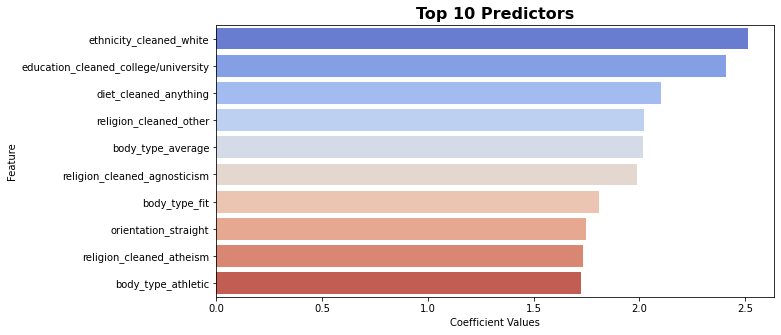

In [78]:
# Extract the feature importance from lr model
importances = lr.coef_[0]
feature_list = list(X.columns)
feature_importance = sorted(zip(importances, feature_list), reverse = True)

# Convert to dataframe and return the result. Subset to top 10 features for plotting
df_feature = pd.DataFrame(feature_importance, columns = ['Coefficient', 'Feature'])
df_feature_top10 = df_feature.head(10)

# Plot the feature importance
plt.figure(figsize = (10, 5))
sns.barplot(data = df_feature_top10, y = 'Feature', x = 'Coefficient', orient = 'h', palette = 'coolwarm')
plt.xlabel('Coefficient Values')
plt.ylabel('Feature')
plt.title('Top 10 Predictors', fontsize = 16, fontweight = 'bold')

## Random Foreset

The second model adopted is Random Forest and it achieved a ROC AUC train score of 0.9997. This result is better than the Logistics Regression. When applied to the test dataset, it achieved a ROC AUC test score of 0.9653. The top 10 predicators are obtained through the feature importance.

In [79]:
# Instantiate, fit and predit using Random Forest
rf = RandomForestClassifier()
rf.fit(Xs_train, y_train)
rf_preds = rf.predict(Xs_test)

In [80]:
metrics(y_train, rf.predict(Xs_train))

Accuracy score: 0.9997 

ROC AUC score: 0.9997 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10846
           1       1.00      1.00      1.00     10847

    accuracy                           1.00     21693
   macro avg       1.00      1.00      1.00     21693
weighted avg       1.00      1.00      1.00     21693

-----------------------------------------------------------------


In [81]:
metrics(y_test, rf_preds)

Accuracy score: 0.9653 

ROC AUC score: 0.9653 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3616
           1       0.94      0.99      0.97      3615

    accuracy                           0.97      7231
   macro avg       0.97      0.97      0.97      7231
weighted avg       0.97      0.97      0.97      7231

-----------------------------------------------------------------


Text(0.5, 1.0, 'Top 10 Predictors')

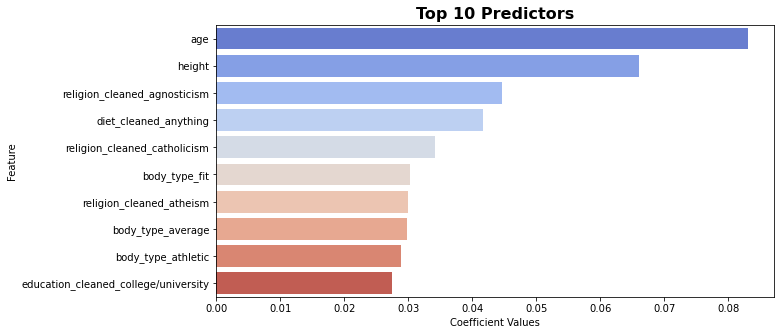

In [82]:
# Extract the feature importance from rf model
importances = rf.feature_importances_
feature_list = list(X.columns)
feature_importance = sorted(zip(importances, feature_list), reverse = True)

# Convert to dataframe and return the result. Subset to top 10 features for plotting
df_feature = pd.DataFrame(feature_importance, columns = ['Coefficient', 'Feature'])
df_feature_top10 = df_feature.head(10)

# Plot the feature importance
plt.figure(figsize = (10, 5))
sns.barplot(data = df_feature_top10, y = 'Feature', x = 'Coefficient', orient = 'h', palette = 'coolwarm')
plt.xlabel('Coefficient Values')
plt.ylabel('Feature')
plt.title('Top 10 Predictors', fontsize = 16, fontweight = 'bold')

## Conclusion and Future Action

- In this project, we have successfully build a model with a ROC AUC score > 0.90 to predict whether an OKCupid user drinks, smokes or uses drugs.
- Moving forward, we may want to consider analysing the essay texts using Natural Language Processing.